In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Data Analytics/SQL/projects/Virat Kohli/71 Centuries of Virat Kohli.csv")

In [3]:
df.head()

Score Out/Not_Out    Opposition  Batting_Order  Innings  Strike_Rate  \
0    116         Out     Australia              6        2          NaN   
1    103         Out   New Zealand              5        2          NaN   
2    103         Out       England              5        2          NaN   
3    107         Out     Australia              5        2          NaN   
4    119         Out  South Africa              4        1          NaN   

                                  Venue           City Home/Away        Date  \
0                         Adelaide Oval       Adelaide      Away  24-01-2012   
1                M. Chinnaswamy Stadium      Bangalore      Home  31-08-2012   
2  Vidarbha Cricket Association Stadium         Nagpur      Home  13-12-2012   
3             M. A. Chidambaram Stadium        Chennai      Home  22-02-2013   
4                     Wanderers Stadium   Johannesburg      Away  18-12-2013   

  Result Format Man_of_the_Match Captain  
0   Lost   Test               No      No  
1    Won   Test              Yes      No  
2  Drawn   Test               No      No  
3    Won   Test               No      No  
4  Drawn   Test               No      No

In [4]:
df.dtypes

Score                 int64
Out/Not_Out          object
Opposition           object
Batting_Order         int64
Innings               int64
Strike_Rate         float64
Venue                object
City                 object
Home/Away            object
Date                 object
Result               object
Format               object
Man_of_the_Match     object
Captain              object
dtype: object

In [5]:
# I want to create a new column called Year from the Date column
df['Year'] = df['Date'].str.split('-').str[2]

In [6]:
df.info()
# We can see the new column Year has been created

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             71 non-null     int64  
 1   Out/Not_Out       71 non-null     object 
 2   Opposition        71 non-null     object 
 3   Batting_Order     71 non-null     int64  
 4   Innings           71 non-null     int64  
 5   Strike_Rate       44 non-null     float64
 6   Venue             71 non-null     object 
 7   City              71 non-null     object 
 8   Home/Away         71 non-null     object 
 9   Date              71 non-null     object 
 10  Result            71 non-null     object 
 11  Format            71 non-null     object 
 12  Man_of_the_Match  71 non-null     object 
 13  Captain           71 non-null     object 
 14  Year              71 non-null     object 
dtypes: float64(1), int64(3), object(11)
memory usage: 8.4+ KB


In [7]:
#change Date data type from object to date
df['Date']=pd.to_datetime(df['Date'], format = '%d-%m-%Y')

In [8]:
df.dtypes

Score                        int64
Out/Not_Out                 object
Opposition                  object
Batting_Order                int64
Innings                      int64
Strike_Rate                float64
Venue                       object
City                        object
Home/Away                   object
Date                datetime64[ns]
Result                      object
Format                      object
Man_of_the_Match            object
Captain                     object
Year                        object
dtype: object

In [9]:
#check for null values
df.isna().sum()
#27 null values are there in Strike_Rate column

Score                0
Out/Not_Out          0
Opposition           0
Batting_Order        0
Innings              0
Strike_Rate         27
Venue                0
City                 0
Home/Away            0
Date                 0
Result               0
Format               0
Man_of_the_Match     0
Captain              0
Year                 0
dtype: int64

In [10]:
#1. Total number of centuries scored
df['Score'].count()

71

Observation: 71 centuries scored by Virat Kohli

In [11]:
#2.Number of centuries against each opposition
sorted_df = df.groupby('Opposition').size().reset_index()
sorted_df.columns = ['Opposition','Century_Count']
sorted_df = sorted_df.sort_values(by ='Century_Count', ascending = False)


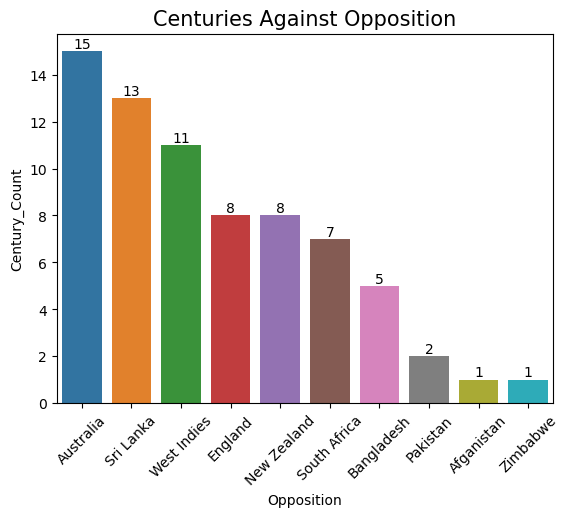

In [96]:
ax = sns.barplot(x = 'Opposition', y = 'Century_Count', data = sorted_df)
for bars in ax.containers:
    ax.bar_label(bars, fontsize = 10)
plt.title('Centuries Against Opposition', fontsize = 15)
plt.xlabel('Opposition', fontsize = 10)
plt.ylabel('Century_Count',fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


Observation: Most centuries (15) against Australia followed by Srilanka (13)

In [14]:
#3. Centuries over the years
century_years = df.groupby('Year').size().reset_index()
century_years.columns = ['Year','Century_Count']


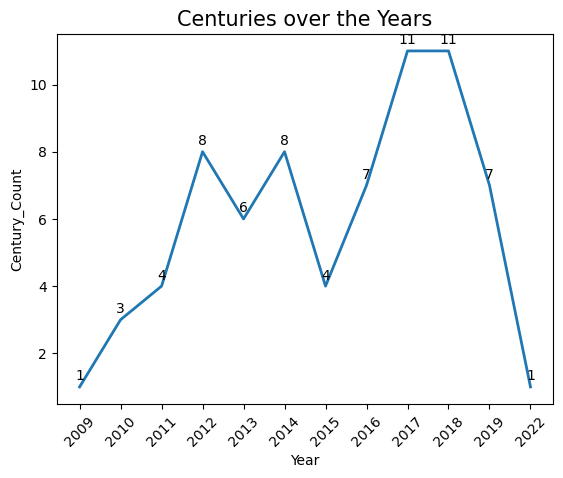

In [129]:
plt.plot(century_years['Year'], century_years['Century_Count'], lw = 2)
for i in range(len(century_years)):
    plt.text(
        x=century_years['Year'][i], 
        y=century_years['Century_Count'][i] + 0.2, 
        s = str(century_years['Century_Count'][i]),
        fontsize=10, 
        ha='center'
    )
plt.title('Centuries over the Years', fontsize = 15)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Century_Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(False)

Observation: He has got the maximum centuries (11) in years 2017 and 2018 with a sharp decline post 2019.

In [18]:
#3. Centuries scored home and away against each opposition
century_opposition = df.groupby(['Opposition','Home/Away']).size().reset_index()
century_opposition.columns = ['Opposition','Home/Away','Century_Count']
century_opposition = century_opposition.sort_values(by = 'Century_Count',ascending = False)


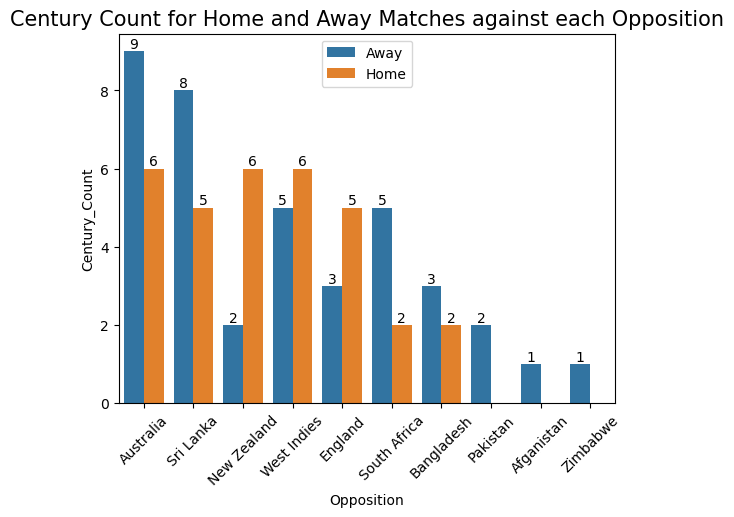

In [21]:
ax = sns.barplot(x = 'Opposition', y = 'Century_Count', hue = 'Home/Away', data = century_opposition)
for bars in ax.containers:
    ax.bar_label (bars,fontsize = 10)
    plt.title('Century Count for Home and Away Matches against each Opposition', fontsize = 15)
    plt.xlabel('Opposition', fontsize = 10)
    plt.ylabel('Century_Count', fontsize = 10)
    plt.xticks(rotation = 45, fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.legend(fontsize = 10)

Observation: Out of his 15 centuries against Australia, he has scored 9 away centuries and 6 centuries at home

In [27]:
#4. Batting order and centuries correlation
batting_order = df.groupby(['Batting_Order','Format']).size().reset_index()
batting_order.columns = ['Batting_Order','Format','Century_Count']


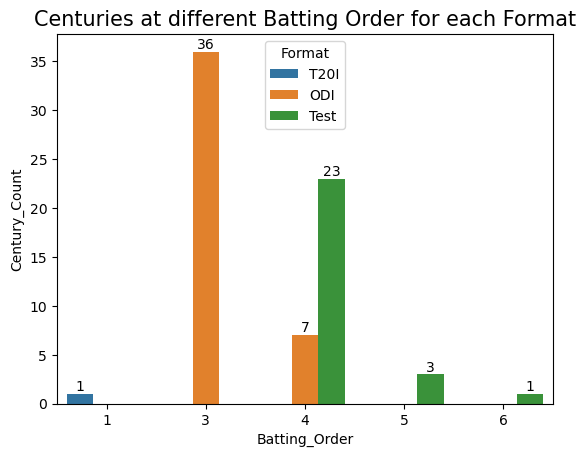

In [29]:
ax = sns.barplot(x = 'Batting_Order', y = 'Century_Count', hue = 'Format', data = batting_order)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Centuries at different Batting Order for each Format',fontsize =15)
    plt.xlabel('Batting_Order',fontsize = 10)
    plt.ylabel('Century_Count', fontsize = 10)
    

Observation: In ODI, his favorite batting order is No 3 (36 centuries) and for Test is No 4 (23 Centuries)

In [30]:
#5.Man of the Match vs Captain or Non Captain from the centuries scored
MOM = df.groupby(['Man_of_the_Match','Captain']).size().reset_index()
MOM.columns = ['Man_of_the_Match','Captain','Century_Count']

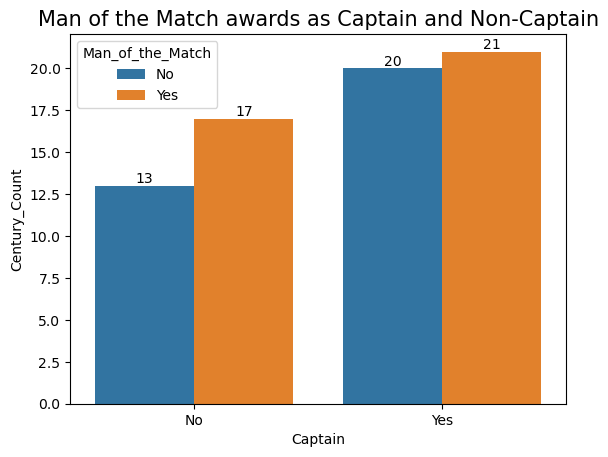

In [32]:
ax = sns.barplot(x = 'Captain', y = 'Century_Count', hue = 'Man_of_the_Match', data = MOM)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Man of the Match awards as Captain and Non-Captain', fontsize = 15)
    

Observation: As a captain he scored 41 centuries and won Man of the Match 21 times and scored 30 centuries as a non-captain and won Man of the Match 17 times

In [35]:
#6. Impact of Centuries on the Match result
Match_Result = df.groupby('Result').size().reset_index()
Match_Result.columns = ['Result','Century_Count']
Match_Result =Match_Result.sort_values('Century_Count',ascending = False)

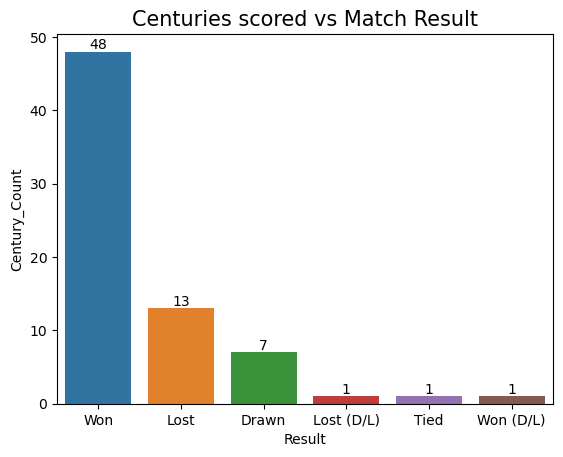

In [37]:
ax = sns.barplot(x = 'Result', y = 'Century_Count', data = Match_Result)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Centuries scored vs Match Result', fontsize = 15)

Observation: Out of 71 Centuries, 49 have resulted in wins ()

In [68]:
#7.Match result after scoring century against each opposition
opposition_result = df.groupby(['Opposition','Result']).size().reset_index()
opposition_result.columns = ['Opposition','Result','Century_Count']


Text(0.5, 1.0, 'Match Result after Scoring a Century against an Opposition')

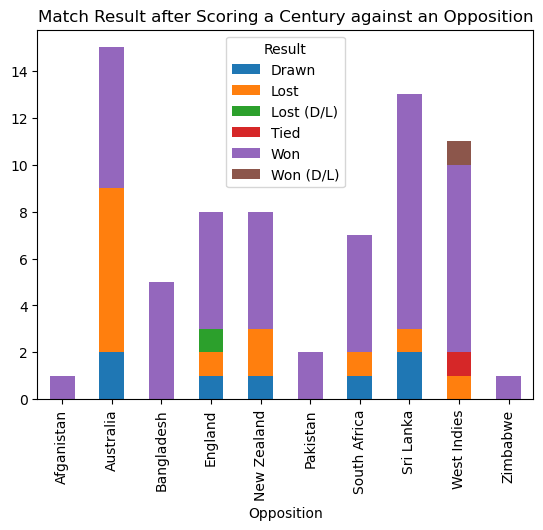

In [93]:
stacked_chart= opposition_result.pivot(index = 'Opposition', columns = 'Result', values = 'Century_Count')
stacked_chart.plot(kind = 'bar', stacked = True)
plt.title('Match Result after Scoring a Century against an Opposition')



Observation: Out of Kohli's 15 centuries against Austalia, 6 have come in wins while 7 have come in losses and 2 in draws.

In [57]:
#8. Out vs Not Out's
batting = df['Out/Not_Out'].value_counts()
batting

Out        51
Not Out    20
Name: Out/Not_Out, dtype: int64

In [61]:
batting_status = df['Out/Not_Out'].unique()
batting_status

array(['Out', 'Not Out'], dtype=object)

Text(0.5, 1.0, 'Out vs Not out after scoring a Century')

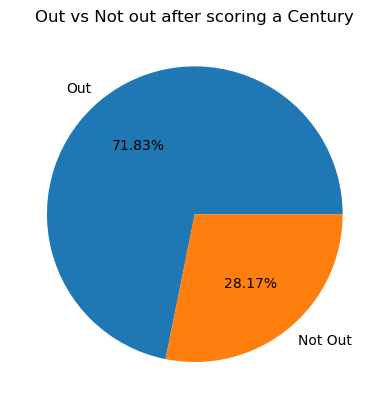

In [92]:
plt.pie(batting,autopct = '%1.2f%%', labels = batting_status)
plt.title('Out vs Not out after scoring a Century')

Observation : Out of 71 centuries scored, Kohli gets out 71.83% times

In [81]:
#9. Centuries scored at home vs Away
century_place = df['Home/Away'].value_counts()
century_place

Away    39
Home    32
Name: Home/Away, dtype: int64

In [85]:
place = df['Home/Away'].unique()
place

array(['Away', 'Home'], dtype=object)

Text(0.5, 1.0, 'Centuries at Home & Away')

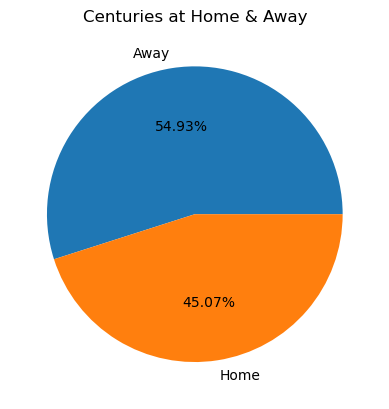

In [91]:
plt.pie(century_place, labels= place, autopct = '%1.2f%%')
plt.title('Centuries at Home & Away')

Observation: Out of Kohli's 71 centuries, 54.93% have come Away and 45.07% have come at Home

In [87]:
#10. Strike Rate against each opposition
SR = df.groupby(['Opposition'],as_index=False)['Strike_Rate'].mean().sort_values(by = 'Strike_Rate',ascending = False)

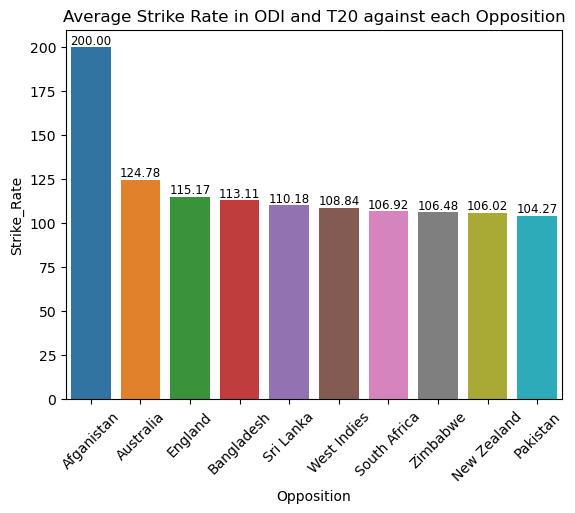

In [103]:
ax = sns.barplot(x = 'Opposition', y = 'Strike_Rate', data = SR)
for bars in ax.containers:
    ax.bar_label(bars,fontsize = 8.5,fmt = '%.2f')
    plt.title('Average Strike Rate in ODI and T20 against each Opposition')
    plt.xticks(rotation = 45)

Observation: Kohli's Avg Strike rate against all oppositions in ODI and T20 when he has scored a century has always been above 100

In [106]:
#11. Kohlis'Top 10 Favorite Hunting grounds
ground = df.groupby('Venue').size().reset_index().head(10)
ground.columns = ['Venue','Century_Count']
ground = ground.sort_values(by = 'Century_Count',ascending = False)

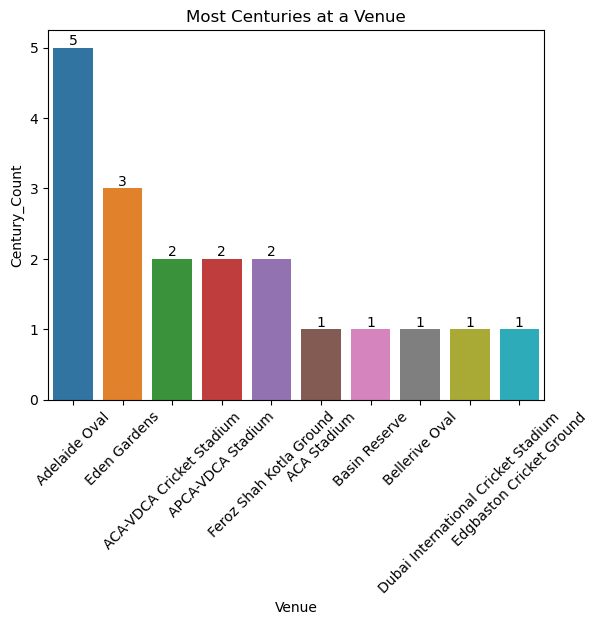

In [114]:
ax = sns.barplot(x = 'Venue', y = 'Century_Count', data = ground)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title('Most Centuries at a Venue')
    plt.xticks(rotation = 45)

Observation: Kohli's most centuries (5) have come at the Adelaide Oval, followed by Eden Gardens (3)

In [121]:
#12. Cumulative centuries over the years.
cum_cent_years = df.groupby('Year').size().reset_index()
cum_cent_years.columns = ['Year','Cumulative_Century_Count']
  

In [123]:
cum_cent_years['Cumulative_Century_Count'] = cum_cent_years['Cumulative_Century_Count'].cumsum()

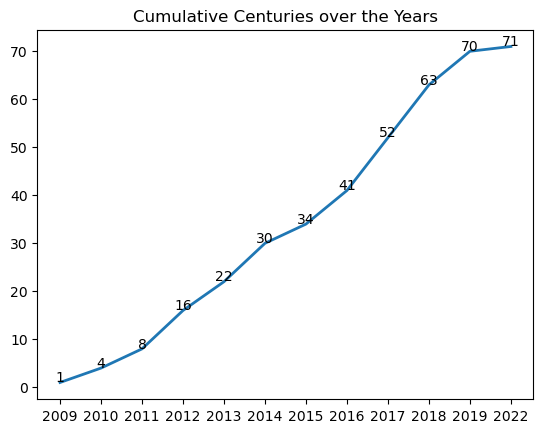

In [131]:
plt.plot(cum_cent_years['Year'],cum_cent_years['Cumulative_Century_Count'],lw = 2)
for i in range(len(cum_cent_years)):
    plt.text(
        x=cum_cent_years['Year'][i], 
        y=cum_cent_years['Cumulative_Century_Count'][i] + 0.2, 
        s = str(cum_cent_years['Cumulative_Century_Count'][i]),
        fontsize=10, 
        ha='center'
    )
    
    plt.title('Cumulative Centuries over the Years')

Observation: 2016-2019 were the most prolific years by centuries scored. From 2019 to 2022, his total centuries has gone up by 1 only 1 century (70-71).